In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Initialize min-max scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
minMaxScaler = preprocessing.MinMaxScaler()

# For VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [4]:
stForReport = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\YELP\yelp_user.csv")
stForReportorReport.head(5)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [6]:
stForRep1 = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\YELP\yelp_review.csv")
stForRep1.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [8]:
stForReport.shape


(1326100, 22)

In [9]:
stForRep1.shape

(5261668, 9)

In [10]:
shortTextDB = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\YELP\yelp_user.csv", usecols=['user_id', 'name', 'review_count'])
shortTextDB.head

<bound method NDFrame.head of                         user_id    name  review_count
0        JJ-aSuM4pCFPdkfoZ34q0Q   Chris            10
1        uUzsFQn_6cXDh6rPNGbIFA   Tiffy             1
2        mBneaEEH5EMyxaVyqS-72A    Mark             6
3        W5mJGs-dcDWRGEhAzUYtoA  Evelyn             3
4        4E8--zUZO1Rr1IBK4_83fg    Lisa            11
...                         ...     ...           ...
1326095  LODBIwiAcKxRi7Wz-sFsKw    Neth             1
1326096  JpY2ozlb30z_AZCq2YX34g    Mike             1
1326097  AU9aZSA1rAjNE5cFcZTVMA   Jalin            12
1326098  s1BZ7-rpqb3xRKcxvArXsQ   Cindy            33
1326099  q-1Tz4SvaTpGEMhI_xwm0Q     Amy             5

[1326100 rows x 3 columns]>

In [11]:
shortTextReview = pd.read_csv(r"C:\Users\admin\Desktop\Datasets\YELP\yelp_review.csv", usecols=['user_id', 'text'])
shortTextReview.head

<bound method NDFrame.head of                         user_id  \
0        bv2nCi5Qv5vroFiqKGopiw   
1        bv2nCi5Qv5vroFiqKGopiw   
2        bv2nCi5Qv5vroFiqKGopiw   
3        bv2nCi5Qv5vroFiqKGopiw   
4        bv2nCi5Qv5vroFiqKGopiw   
...                         ...   
5261663  mPjPyipaD0C_myqWqDipZg   
5261664  mPjPyipaD0C_myqWqDipZg   
5261665  mPjPyipaD0C_myqWqDipZg   
5261666  mPjPyipaD0C_myqWqDipZg   
5261667  mPjPyipaD0C_myqWqDipZg   

                                                      text  
0        Super simple place but amazing nonetheless. It...  
1        Small unassuming place that changes their menu...  
2        Lester's is located in a beautiful neighborhoo...  
3        Love coming here. Yes the place always needs t...  
4        Had their chocolate almond croissant and it wa...  
...                                                    ...  
5261663  Bought groupon $39 for 4 months from groupon, ...  
5261664  Spring rolls was pretty good, cod was a bit ra...  


In [12]:
# merge the two csv files based on user_id

merged = pd.merge(shortTextDB, shortTextReview, on='user_id', how='inner')
merged.head()

,user_id,name,review_count,text
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,Was in town to watch the Seahawks vs Panthers ...
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,I went last night to celebrate my boyfriend's ...
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,I've been going to Ultra for seven months now ...
3,mBneaEEH5EMyxaVyqS-72A,Mark,6,If you enjoy bargain hunting half as much as I...
4,mBneaEEH5EMyxaVyqS-72A,Mark,6,My wife and I regularly hit up Ah-So for Happy...


In [13]:
merged.shape

(5261662, 4)

In [14]:
# All 50K + fields are not needed. 

# Keeping only top 10K 

mergedST = merged[:10000]
mergedST.shape
mergedST.drop('user_id', axis=1, inplace=True)

In [15]:
mergedST.head()

,name,review_count,text
0,Chris,10,Was in town to watch the Seahawks vs Panthers ...
1,Tiffy,1,I went last night to celebrate my boyfriend's ...
2,Mark,6,I've been going to Ultra for seven months now ...
3,Mark,6,If you enjoy bargain hunting half as much as I...
4,Mark,6,My wife and I regularly hit up Ah-So for Happy...


### TOP 20 AUTHORS

In [16]:
finalDF = mergedST.groupby(['name'], sort=False)['review_count'].count().nlargest(n=20)
finalDF

name
Laurie         360
Tonia          264
Paul           207
Hazel          207
Andrea         206
Ellen          195
Nancy          169
Anh            168
Leslie-Anne    159
Danielle       156
Courtney       153
Billy          150
Joan           148
Diana          124
David          120
Anna           117
Rhonda         111
Morgan         109
Eva            101
Joanna          88
Name: review_count, dtype: int64

In [20]:
finalDF.isna().value_counts()

False    20
Name: review_count, dtype: int64

Text(0, 0.5, 'review count')

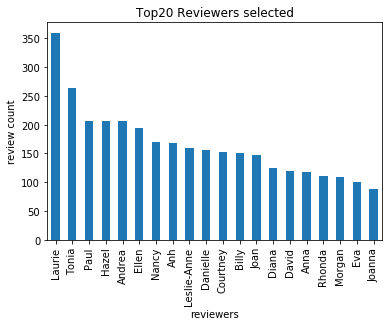

In [19]:
barChart = finalDF.plot.bar(title="Top20 Reviewers selected")
barChart.set_xlabel("reviewers")
barChart.set_ylabel("review count")


In [9]:
finalDF.index


Index(['Laurie', 'Tonia', 'Paul', 'Hazel', 'Andrea', 'Ellen', 'Nancy', 'Anh',
       'Leslie-Anne', 'Danielle', 'Courtney', 'Billy', 'Joan', 'Diana',
       'David', 'Anna', 'Rhonda', 'Morgan', 'Eva', 'Joanna'],
      dtype='object', name='name')

In [22]:
# Keep the rows in the DF pertaining to the names in finalDF.index

# df.loc[df['column_name'].isin(some_values)]

mergedST_20 = mergedST.loc[mergedST['name'].isin(finalDF.index)]
mergedST_20.head(10)

,name,review_count,text
129,Diana,1,November 30th around 12:20 AM I went to my clo...
259,David,1,Ken and Debra are amazing real estate agents! ...
570,Morgan,5,Almost every time I've been here they get my o...
571,Morgan,5,My family and I try to go to the Irish Wolfhou...
572,Morgan,5,"I had heard the name before, but never gone to..."
573,Morgan,5,I ordered a single salad and an order of wings...
794,Courtney,4,I love pizza but NOT this pizza at this place!...
867,Joan,4,We moved here from South Dakota the end of Jun...
868,Joan,4,Everyone was so sweet and caring. Tryna was am...
869,David,109,"For Americanized Mexican food, this place is e..."


### Keras 

In [23]:
# Load Keras models and layers

from numpy import loadtxt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

#### Test Train Split

In [24]:
# Slice the text length to 500

#mergedST_20['text'] = mergedST_20['text'].str[:500]
X = mergedST_20.iloc[:,0:2]
y = mergedST_20.iloc[:,2]

print(X.shape)
print(y.shape)

X.drop('review_count', axis=1, inplace=True)
X.head

(3312, 2)
(3312,)


<bound method NDFrame.head of         name
129    Diana
259    David
570   Morgan
571   Morgan
572   Morgan
...      ...
9890     Anh
9891     Anh
9892     Anh
9893     Anh
9903    Anna

[3312 rows x 1 columns]>

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
# X_train=X_train_tent
# X_test=X_test_tent

# y_train=y_train_tent
# y_test=y_test_tent

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2649, 1)
(2649,)
(663, 1)
(663,)


In [27]:
print(y_test)

7944    If your discharged patient into rehab is at al...
5931    I wandered in here after a great meal, looking...
3002    So dangerously within walking distance of most...
3213    I have wanted to do this since moving from Van...
8027    I went to Lustre bar for my boyfriends birthda...
                              ...                        
3495    This Borders is really hit or miss.  They have...
7645    Oh it was very good. Loved everything I tried....
8582    This is a great spot to watch sports games goi...
7420    I would agree that this is some of the best ne...
1929    I know how this place gets busy that's why i c...
Name: text, Length: 663, dtype: object


In [28]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence

vocSizeList = []
hashList=[]

for line in y_train.values: 
    seq_words = set(text_to_word_sequence(line))   
    vocab_size = len(seq_words)
    vocSizeList.append(vocab_size) 
    result = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashList.append(result)

print(hashList)
#print(len(hashList))

[[14, 18, 108, 57, 132, 138, 44, 14, 148, 4, 99, 143, 20, 14, 113, 57, 125, 123, 95, 59, 132, 138, 27, 69, 143, 123, 75, 82, 29, 105, 22, 14, 133, 82, 99, 143, 107, 105, 21, 103, 69, 49, 15, 20, 25, 143, 101, 136, 111, 117, 89, 18, 29, 53, 77, 21, 4, 43, 2, 57, 95, 22, 128, 14, 20, 99, 124, 52, 89, 101, 68, 29, 139, 137, 58, 69, 132, 113, 123, 100, 11, 58, 30, 54, 4, 100, 75, 82, 132, 10, 128, 115, 145, 95, 5, 29, 121, 27, 69, 125, 123, 150, 2, 57, 135, 142, 117, 149, 101, 105, 123, 69, 43, 57, 107, 5, 142, 14, 113], [70, 183, 217, 153, 72, 19, 324, 208, 40, 172, 64, 175, 248, 276, 64, 164, 205, 210, 153, 225, 260, 31, 185, 223, 22, 58, 72, 188, 210, 58, 59, 64, 171, 167, 153, 72, 202, 188, 226, 172, 98, 64, 257, 279, 210, 203, 190, 323, 264, 276, 153, 184, 222, 312, 299, 27, 260, 104, 198, 210, 328, 156, 217, 58, 48, 259, 93, 37, 254, 70, 264, 159, 214, 226, 40, 313, 276, 131, 65, 239, 326, 190, 321, 228, 22, 58, 159, 40, 208, 120, 59, 190, 270, 110, 287, 43, 342, 165, 226, 159, 190, 

In [29]:
# Repeat the same for y_test

vocSizeListTest = []
hashListTest=[]

for line in y_test: 
    #print(line)
    seq_words_test = set(text_to_word_sequence(line))   
    vocab_size_test = len(seq_words_test)
    vocSizeListTest.append(vocab_size_test)
 
    result_y_test = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListTest.append(result_y_test)

hashListTest

[[168,
  96,
  77,
  143,
  185,
  99,
  176,
  159,
  58,
  86,
  16,
  60,
  133,
  107,
  99,
  21,
  96,
  149,
  82,
  125,
  166,
  55,
  100,
  72,
  72,
  72,
  157,
  168,
  20,
  96,
  19,
  90,
  172,
  87,
  114,
  73,
  10,
  162,
  64,
  76,
  157,
  174,
  10,
  170,
  99,
  61,
  104,
  72,
  147,
  9,
  122,
  124,
  10,
  96,
  136,
  30,
  120,
  116,
  116,
  9,
  114,
  112,
  186,
  88,
  96,
  68,
  143,
  27,
  10,
  123,
  1,
  86,
  5,
  124,
  158,
  168,
  183,
  143,
  59,
  37,
  5,
  34,
  123,
  86,
  124,
  183,
  104,
  1,
  183,
  143,
  16,
  149,
  168,
  130,
  34,
  86,
  159,
  58,
  10,
  50,
  137,
  183,
  100,
  157,
  18,
  29,
  86,
  144,
  101,
  86,
  176,
  5,
  82,
  183,
  99,
  137,
  86,
  144,
  51,
  60,
  153,
  39,
  164,
  115,
  30,
  86,
  5,
  124,
  170,
  159,
  178,
  98,
  114,
  6,
  21,
  183,
  144,
  8,
  113,
  187,
  175,
  114,
  187,
  127,
  82,
  71,
  99,
  119,
  116,
  119,
  174,
  157,
  41,
  5,
  157,
  

In [30]:
# Repeat the same for X_test and X_train

vocSizeListX_train = []
hashListX_train=[]

for line in X_train['name']: 
    print(line)
    seq_words_Xtrain = set(text_to_word_sequence(line))   
    vocab_size_Xtrain = len(seq_words_Xtrain)
    vocSizeListX_train.append(vocab_size_Xtrain)
 
    result_X_train = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListX_train.append(result_X_train)

hashListX_train

# ************************************************************
# ************************************************************

test_string_new = hashListX_train
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

x_train_new = pd.DataFrame([hashListX_train])
x_train_new

x_train_transpose = x_train_new.transpose()
x_train_transpose

x_train_new = x_train_transpose
x_train_new
print("**************", x_train_new.shape)

Hazel
Tonia
Laurie
Billy
Leslie-Anne
Nancy
Joanna
David
Hazel
Anna
Joan
Nancy
Billy
Ellen
Rhonda
David
Joan
Leslie-Anne
Joan
Paul
Laurie
Paul
Anh
Anna
Anh
Tonia
Joan
Billy
Nancy
Billy
Hazel
Nancy
Morgan
Billy
Rhonda
Joan
Billy
Anh
Anna
Courtney
Anna
Ellen
Courtney
Tonia
Anh
David
Laurie
Laurie
Rhonda
Danielle
Eva
Courtney
Joan
Anna
Anh
Eva
Joan
Hazel
Danielle
Paul
Hazel
Diana
Joanna
Anh
Nancy
Rhonda
Laurie
Nancy
Anh
Andrea
Laurie
Leslie-Anne
Leslie-Anne
Diana
Tonia
David
Danielle
Joanna
Eva
Diana
Anna
Laurie
Rhonda
Joan
Courtney
Tonia
Nancy
Laurie
Paul
Eva
Joanna
Rhonda
Andrea
Leslie-Anne
Joanna
Laurie
Joanna
Courtney
Courtney
Courtney
Nancy
Nancy
Andrea
Courtney
Andrea
Hazel
Laurie
Anna
Eva
Nancy
Hazel
Morgan
Courtney
Tonia
Joanna
Joan
Paul
Laurie
Morgan
Hazel
Ellen
Morgan
David
Morgan
Eva
Ellen
Anna
Danielle
Tonia
Rhonda
Diana
Paul
Laurie
Tonia
Leslie-Anne
Ellen
Nancy
Billy
Andrea
Laurie
Leslie-Anne
Anh
Ellen
Paul
Courtney
Danielle
Tonia
Courtney
Anna
Danielle
Paul
Joan
Tonia
Tonia
N

Ellen
Hazel
Anh
Leslie-Anne
Leslie-Anne
Anna
Anh
Courtney
Joanna
Rhonda
Paul
Tonia
Andrea
Anna
Tonia
Joan
Morgan
Hazel
Rhonda
Andrea
Ellen
Rhonda
Rhonda
Danielle
Nancy
Eva
Joan
Tonia
Anh
Andrea
Ellen
Rhonda
Joanna
Leslie-Anne
Tonia
Danielle
Laurie
Laurie
Anna
Anh
Laurie
Danielle
Laurie
David
Anna
Joan
Danielle
Paul
David
Ellen
Courtney
Diana
Leslie-Anne
Morgan
Andrea
Leslie-Anne
Courtney
Laurie
Eva
Hazel
Joanna
Diana
Hazel
Paul
Laurie
Anh
Ellen
Tonia
Anna
Rhonda
Courtney
David
Joan
Laurie
Joan
Joanna
Eva
Andrea
David
Anh
Diana
Nancy
Tonia
Hazel
Laurie
Hazel
Diana
Ellen
Joan
Paul
Leslie-Anne
Paul
Danielle
Billy
Leslie-Anne
Anna
David
Anh
Joan
Morgan
Joan
Danielle
Nancy
Rhonda
Tonia
Danielle
David
Danielle
Joan
Nancy
Laurie
Nancy
Billy
Anna
Rhonda
Rhonda
Ellen
Danielle
Joanna
Nancy
Tonia
Paul
Rhonda
Laurie
Laurie
Danielle
Laurie
Leslie-Anne
David
Joanna
Tonia
Tonia
Andrea
Tonia
Andrea
Anh
Paul
Anh
Ellen
Tonia
Hazel
Joan
Paul
Rhonda
Anna
Laurie
Diana
Tonia
Anh
Laurie
Danielle
Billy
Tonia


In [31]:
vocSizeListX_test = []
hashListX_test=[]

for line in X_test['name']: 
    #print(line)
    seq_words_Xtest = set(text_to_word_sequence(line))   
    vocab_size_Xtest = len(seq_words_Xtest)
    vocSizeListX_test.append(vocab_size_Xtest)
 
    result_X_test = hashing_trick(line, round(vocab_size*2), hash_function='md5')
    hashListX_test.append(result_X_test)

hashListX_test

# ************************************************************
# ************************************************************

test_string_new = hashListX_test
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

x_test_new = pd.DataFrame([hashListX_test])
x_test_new

x_test_transpose = x_test_new.transpose()

x_test_new = x_test_transpose
x_test_new

,0
0,[170]
1,"[54, 155]"
2,[141]
3,[99]
4,[84]
...,...
658,[111]
659,[97]
660,[108]
661,[17]


In [32]:
test_string_new = hashListTest[0]
test_string_new

for elem in test_string_new:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

y_test_new = pd.DataFrame([hashListTest])
y_test_new

y_test_transpose = y_test_new.transpose()
y_test_transpose

y_test = y_test_transpose
y_test

,0
0,"[168, 96, 77, 143, 185, 99, 176, 159, 58, 86, ..."
1,"[174, 33, 171, 140, 178, 114, 113, 85, 49, 55,..."
2,"[95, 174, 67, 153, 91, 86, 96, 69, 86, 128, 10..."
3,"[174, 73, 5, 82, 27, 150, 158, 57, 155, 82, 82..."
4,"[174, 143, 82, 165, 185, 55, 90, 95, 46, 124, ..."
...,...
658,"[150, 31, 176, 170, 61, 149, 146, 10, 73, 114,..."
659,"[172, 14, 46, 156, 179, 118, 36, 174, 89, 73, ..."
660,"[150, 176, 114, 113, 55, 82, 19, 178, 133, 155..."
661,"[174, 173, 154, 131, 150, 176, 109, 86, 183, 3..."


In [33]:
test_string = hashList[0]
test_string

for elem in test_string:
    #print(elem)
    elem = str(elem)
    #print(type(elem))

y_train_new = pd.DataFrame([hashList])

y_train_new
y_train_transpose = y_train_new.transpose()
y_train_transpose

y_train = y_train_transpose
print("*****",y_train)

*****                                                       0
0     [14, 18, 108, 57, 132, 138, 44, 14, 148, 4, 99...
1     [70, 183, 217, 153, 72, 19, 324, 208, 40, 172,...
2     [53, 19, 21, 60, 63, 48, 19, 75, 48, 53, 68, 1...
3     [363, 365, 426, 49, 475, 353, 90, 460, 38, 478...
4     [109, 15, 40, 29, 39, 111, 52, 15, 64, 15, 40,...
...                                                 ...
2644  [8, 59, 23, 56, 6, 42, 26, 64, 40, 65, 53, 75,...
2645  [43, 157, 108, 231, 227, 83, 163, 77, 123, 107...
2646  [143, 16, 36, 112, 17, 63, 123, 6, 119, 14, 15...
2647  [91, 20, 35, 136, 138, 132, 118, 11, 28, 127, ...
2648  [179, 39, 179, 143, 179, 51, 174, 183, 150, 11...

[2649 rows x 1 columns]


In [34]:
x_train_new

,0
0,[19]
1,[163]
2,[97]
3,[111]
4,"[54, 155]"
...,...
2644,[87]
2645,[111]
2646,[64]
2647,[19]


In [36]:
blank1=[]
blank2=[]
for i in range(0,len(x_train_new)):
    x_train_arr = x_train_new[0][i][0]
    blank1.append(x_train_arr)
#print(blank1)

for j in range(0,len(y_train)):
    for k in range(0, len(y_train[0][j])):
        y_train_arr = y_train[0][j][k]
        blank2.append(y_train_arr)

blank3=[]
blank4=[]

for i in range(0,len(x_test_new)):
    x_test_arr = x_test_new[0][i][0]
    blank3.append(x_test_arr)
#print(blank3)

y_test_trans = y_test_new.transpose()
y_test_trans

for j in range(0,len(y_test_trans)):
    for k in range(0, len(y_test_trans[0][j])):
        y_test_arr = y_test_trans[0][j][k]
        blank4.append(y_test_arr)
#print(blank4)

# *****************************


x_test_arr = np.asarray(blank3)
xTrain_arr = np.asarray(blank1)
yTrain_arr = np.asarray(blank2)
y_test_arr = np.asarray(blank4) 
  
# # *************************

print("************", xTrain_arr)
# print("************", yTrain_arr.dtype)
# print("************", y_test_arr.dtype)
# print("************", x_test_arr.dtype)

************ [ 19 163  97 ...  64  19  64]


In [41]:
"""
x sizes: 2649
y sizes: 213945
"""

y_test_arr_trunc = y_test_arr[:663]
x_test_arr_trunc = yTrain_arr[:2649]

In [38]:
# Define the model

model = Sequential()
from keras.layers import Input

model.add(Dense(units=4, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='selu'))

tokenizer = Tokenizer(num_words=10000)

model.summary()

[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
(None, 1) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 1) float32
dense_1 (None, 4) float32
dense_2 (None, 8) float32


[None, None, None]

In [39]:
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [40]:
# Output layer: SELU activation function

#tf.config.run_functions_eagerly(True)
model.fit(yTrain_arr_trunc, xTrain_arr, validation_data=(y_test_arr_trunc, x_test_arr),batch_size=10,epochs=5)

NameError: name 'yTrain_arr_trunc' is not defined

In [ ]:
model.fit(xTrain_arr, yTrain_arr_trunc, validation_data=(x_test_arr, y_test_arr_trunc),batch_size=3,epochs=5)

In [ ]:
# Evaluate the model

_, accuracy = model.evaluate(yTrain_arr_trunc, xTrain_arr, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
model.fit(yTrain_arr_trunc, xTrain_arr, validation_data=(y_test_arr_trunc, x_test_arr),batch_size=10,epochs=5)

### TOP 10 AUTHORS

In [ ]:
finalDF = mergedST.groupby(['name'], sort=False)['review_count'].count().nlargest(n=10)
finalDF

### TOP 5 AUTHORS

### Negative words as feature set

In [ ]:
# Define a dictionary of negative words to be used as stylistic markers

negDict = {}

"""
A
abysmaladversealarmingangryannoyanxiousapathyappallingatrociousawful
B
badbanalbarbedbelligerentbemoanbeneathboringbroken
C
callouscan'tclumsycoarsecoldcold-heartedcollapseconfusedcontradictorycontrarycorrosivecorruptcrazycreepycriminalcruelcrycutting
D
damagedamagingdastardlydeaddecayingdeformeddenydeplorabledepresseddepriveddespicabledetrimentaldirtydiseasedisgustingdisheveleddishonestdishonorabledismaldistressdon'tdreadfuldreary
E-F
enragederodingevilfailfaultyfearfeeblefightfilthyfoulfrightenfrightful
G
gawkyghastlygravegreedgrimgrimacegrossgrotesquegruesomeguilty
H
haggardhardhard-heartedharmfulhatehideoushomelyhorrendoushorriblehostilehurthurtful
I
ickyignorantignoreillimmatureimperfectimpossibleinaneinelegantinfernalinjureinjuriousinsaneinsidiousinsipid
J-L
jealousjunkyloselousylumpy
M
maliciousmeanmenacingmessymisshapenmissingmisunderstoodmoanmoldymonstrous
N
naivenastynaughtynegatenegativenevernonobodynondescriptnonsensenotnoxious
O
objectionableodiousoffensiveoldoppressive
P
painperturbpessimisticpettyplainpoisonouspoorprejudice
Q-R
questionablequirkyquitrejectrenegerepellantreptilianrepugnantrepulsiverevengerevoltingrockyrottenruderuthless
S
sadsavagescarescaryscreamsevereshockingshoddysicksickeningsinisterslimysmellysobbingsorryspitefulstickystinkystormystressfulstuckstupidsubstandardsuspectsuspicious
T-U
tenseterribleterrifyingthreateninguglyundermineunfairunfavorableunhappyunhealthyunjustunluckyunpleasantunsatisfactoryunsightlyuntowardunwantedunwelcomeunwholesomeunwieldyunwiseupset
V
viceviciousvilevillainousvindictive
W
warywearywickedwoefulworthlesswound
Y-Z
yellyuckyzero

"""